## Data Augmentation of Existing MNIST Images

In [34]:
from sklearn.datasets import fetch_openml

mnist_data = fetch_openml("mnist_784", as_frame=False, parser='auto')

In [35]:
# Split data into train and test sets.

data_orig = mnist_data.data
labels = mnist_data.target

X_train, y_train = data_orig[:60000], labels[:60000]
X_test, y_test = data_orig[60000:], labels[60000:]

### Display a Sample Image

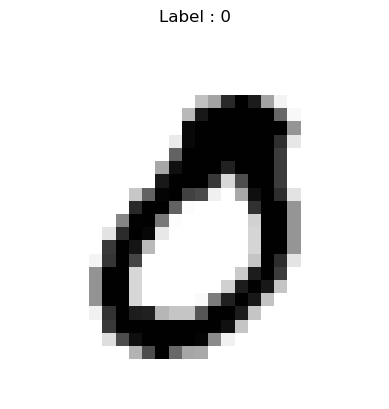

In [36]:
import matplotlib.pyplot as plt
import numpy as np

idx = 75
some_img = X_train[idx]

plt.imshow(some_img.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Label : {y_train[idx]}")
plt.show()

### Define a function to Introduce Translation to Images.

In [87]:
def translate(X, direction, pix=1):
    '''
    Inputs:
    X, y : features, targets
    direction : str obj ("left", "right", "up", "down")
    pix : number of pixels to shift by
    
    "left" means to shift image to the left.
    '''
    assert direction.lower() in ("left", "right", "up", "down"), "Invalid direction"
    m = X.shape[0]
    
    if direction.lower() == "right":
        X_new = np.concatenate((np.zeros((m, 28, pix)), X.reshape(m, 28, 28)), axis=2)
        X_new = X_new[:, :, :28]
    elif direction.lower() == "left":
        X_new = np.concatenate((X.reshape(m, 28, 28), np.zeros((m, 28, pix))), axis=2)
        X_new = X_new[:, :, pix:]               
    elif direction.lower() == "up":
        X_new = np.concatenate((X.reshape(m, 28, 28), np.zeros((m, pix, 28))), axis=1)
        X_new = X_new[:, pix:, :] 
    else:
        X_new = np.concatenate((np.zeros((m, pix, 28)), X.reshape(m, 28, 28)), axis=1)
        X_new = X_new[:, :28, :] 
    
    return X_new.reshape(m, 784)

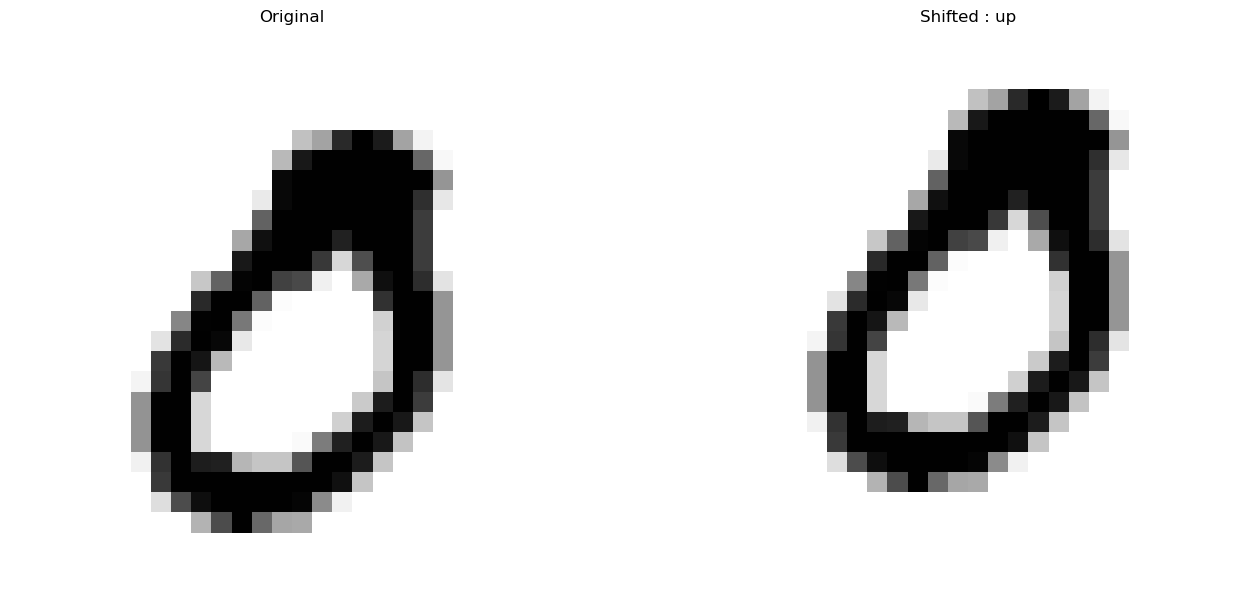

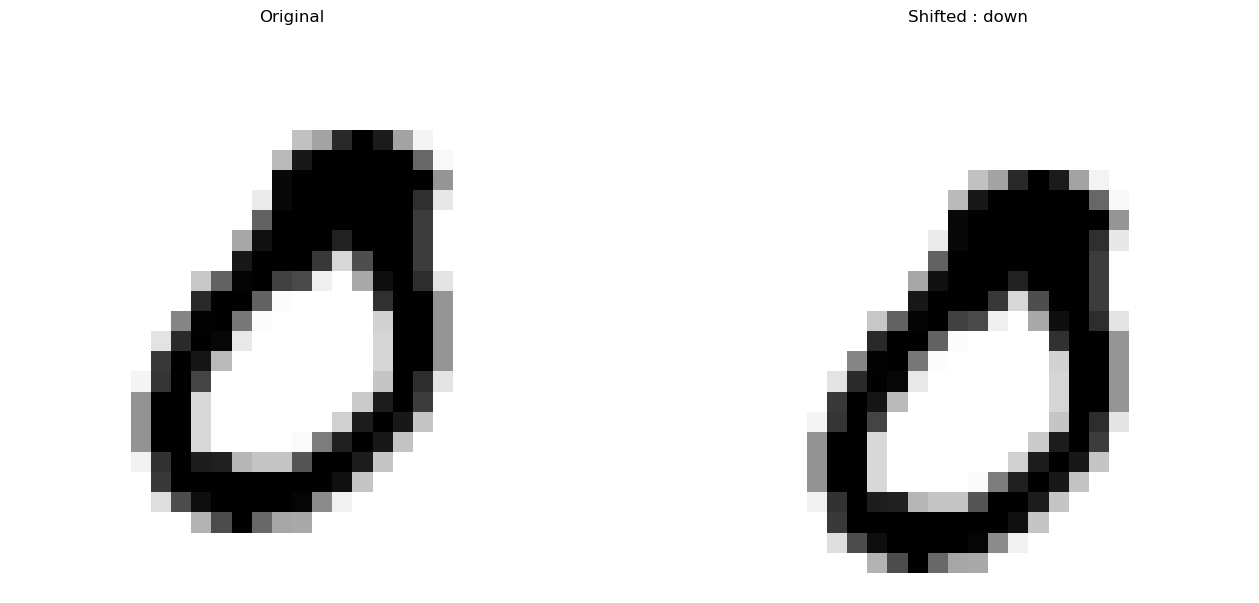

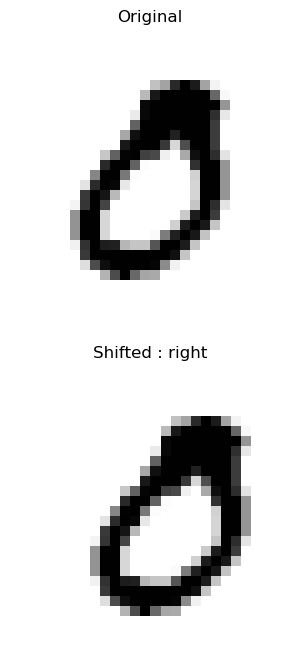

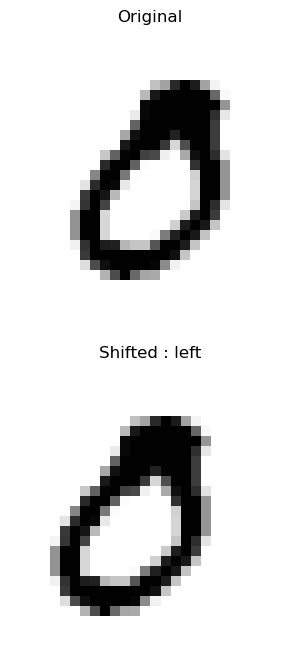

In [89]:
# Sanity Check

for direction in ["up", "down"]:
    X_train_new = translate(X_train, direction, pix=2)
    some_img_new = X_train_new[idx]
    plt.figure(figsize=(16, 8))
    
    plt.subplot(1, 2, 2)
    plt.imshow(some_img_new.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"Shifted : {direction}")
    
    plt.subplot(1, 2, 1)
    plt.imshow(some_img.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"Original")
    plt.show()
    
for direction in ["right", "left"]:
    X_train_new = translate(X_train, direction, pix=2)
    some_img_new = X_train_new[idx]
    plt.figure(figsize=(16, 8))
    
    plt.subplot(2, 1, 2)
    plt.imshow(some_img_new.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"Shifted : {direction}")
    
    plt.subplot(2, 1, 1)
    plt.imshow(some_img.reshape(28, 28), cmap="binary")
    plt.axis("off")
    plt.title(f"Original")
    plt.show()

### Strategy for Translating Data
Split 60,000 into 8 "7,500" sized batches and translate each batch with unique direction. <br> Before proceeding we must check the distribution of targets in each batch.

In [142]:
import pandas as pd

y_train_splits = np.array_split(y_train.flatten(), 8)
y_train_splits = np.array(y_train_splits)

splits = pd.DataFrame(y_train_splits.T, columns=np.arange(8))

In [143]:
distribution = pd.DataFrame([splits[i].value_counts().sort_index() / 7500 for i in range(8)])
distribution.set_index(np.arange(1, 9), inplace=True)
distribution

,0,1,2,3,4,5,6,7,8,9
1,0.099333,0.112267,0.096933,0.101600,0.101067,0.088400,0.100133,0.107333,0.093467,0.099467
2,0.100133,0.113067,0.098000,0.104800,0.094667,0.087333,0.098533,0.105067,0.097467,0.100933
3,0.099067,0.116133,0.097733,0.107200,0.096533,0.089733,0.096800,0.099067,0.095467,0.102267
4,0.096267,0.114933,0.100400,0.096133,0.097867,0.095733,0.101200,0.102800,0.096933,0.097733
5,0.093733,0.113067,0.098533,0.102400,0.097733,0.088667,0.100267,0.101600,0.099867,0.104133
6,0.101867,0.114267,0.100800,0.096933,0.095467,0.090933,0.098267,0.106000,0.096533,0.098933
7,0.100800,0.109333,0.101333,0.104400,0.095200,0.091067,0.098667,0.104667,0.100800,0.093733
8,0.098533,0.105867,0.100667,0.104000,0.100400,0.090933,0.095200,0.108800,0.099600,0.096000


The labels seem to uniformly distributed across all batches. We can proceed to translating these images.

In [144]:
X_train_splits = np.array_split(X_train, 8)

# left 
X_train_splits[0] = translate(X_train_splits[0], direction="left", pix=2)
# left up
X_train_splits[1] = translate(X_train_splits[1], direction="left", pix=2)
X_train_splits[1] = translate(X_train_splits[1], direction="up", pix=2)
# up
X_train_splits[2] = translate(X_train_splits[2], direction="up", pix=2)
# up right
X_train_splits[3] = translate(X_train_splits[3], direction="up", pix=2)
X_train_splits[3] = translate(X_train_splits[3], direction="right", pix=2)
# right
X_train_splits[4] = translate(X_train_splits[4], direction="right", pix=2)
# down right
X_train_splits[5] = translate(X_train_splits[5], direction="right", pix=2)
X_train_splits[5] = translate(X_train_splits[5], direction="down", pix=2)
# down
X_train_splits[6] = translate(X_train_splits[6], direction="down", pix=2)
# down left
X_train_splits[7] = translate(X_train_splits[7], direction="down", pix=2)
X_train_splits[7] = translate(X_train_splits[7], direction="left", pix=2)

In [145]:
X_train_splits = np.array(X_train_splits)
X_train_trans = X_train_splits.reshape(60000, 784)

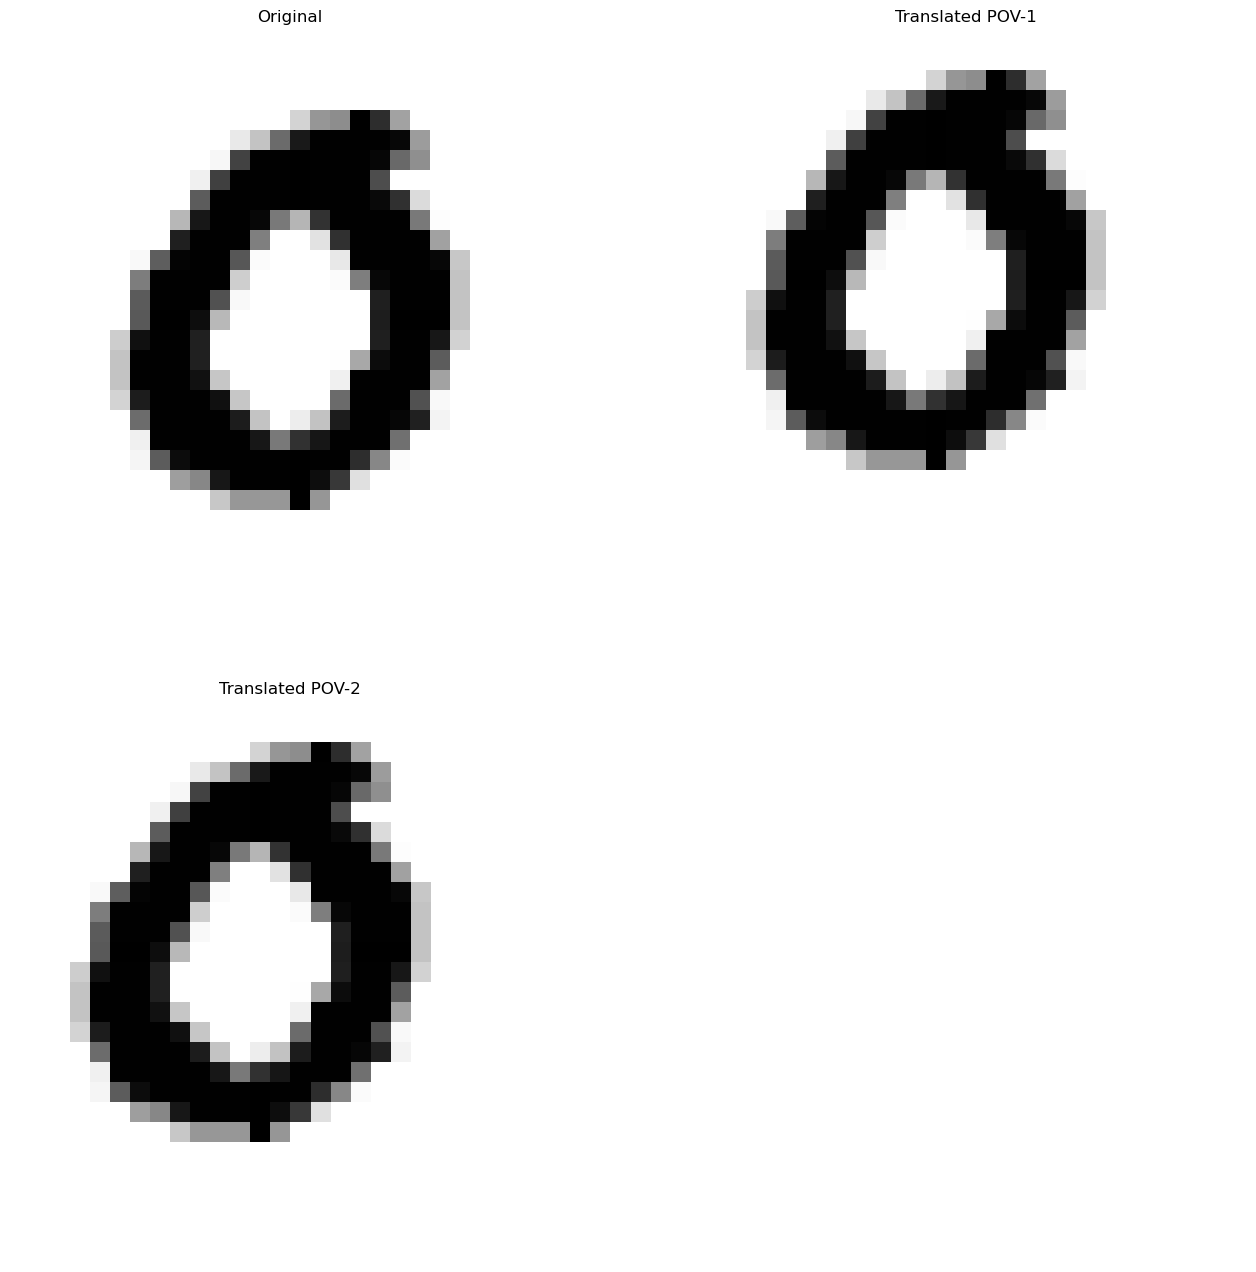

In [146]:
# Sanity check
idx = 8000
some_img = X_train[idx]
some_img_trans = X_train_trans[idx]

plt.figure(figsize=(16, 16))

plt.subplot(2, 2, 1)
plt.imshow(some_img.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Original")

plt.subplot(2, 2, 2)
plt.imshow(some_img_trans.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Translated POV-1")

plt.subplot(2, 2, 3)
plt.imshow(some_img_trans.reshape(28, 28), cmap="binary")
plt.axis("off")
plt.title(f"Translated POV-2")
plt.show()

### Save Augmented Data

In [149]:
trans_data = pd.DataFrame(X_train_trans.T)
trans_data.to_csv('augmented.csv', index=False)